# Tutorial for `fromdecay` functionality
This tutorial shows how `phasespace.fromdecay` can be used.

This submodule makes it possible for `phasespace` and [`decaylanguage`](https://github.com/scikit-hep/decaylanguage/) to work together.
More generally, `fromdecay` can also be used as a high-level interface for simulating particles that can decay in multiple different ways.

In [6]:
# Import libraries
from pprint import pprint
from decaylanguage import DecFileParser, DecayChainViewer
# TODO rename
from phasespace.fulldecay import FullDecay

DecayLanguage can be used to parse and view .dec files. These files contain information about how a particle decays and with which probability. For more information about DecayLanguage and .dec files, see the [DecayLanguage](https://github.com/scikit-hep/decaylanguage) documentation.

We will begin by parsing a .dec file using DecayLanguage:

In [3]:
parser = DecFileParser('../tests/fulldecay/example_decays.dec')
parser.parse()

From the `parser` variable, one can access a certain decay for a particle using `parser.build_decay_chains`. This will be a `dict` that contains all information about how the mother particle, daughter particles etc. decay.

In [7]:
pi0_chain = parser.build_decay_chains("pi0")
pprint(pi0_chain)

{'pi0': [{'bf': 0.988228297,
          'fs': ['gamma', 'gamma'],
          'model': 'PHSP',
          'model_params': ''},
         {'bf': 0.011738247,
          'fs': ['e+', 'e-', 'gamma'],
          'model': 'PI0_DALITZ',
          'model_params': ''},
         {'bf': 3.3392e-05,
          'fs': ['e+', 'e+', 'e-', 'e-'],
          'model': 'PHSP',
          'model_params': ''},
         {'bf': 6.5e-08,
          'fs': ['e+', 'e-'],
          'model': 'PHSP',
          'model_params': ''}]}


This `dict` can also be displayed in a more human-readable way using `DecayChainViewer`: 

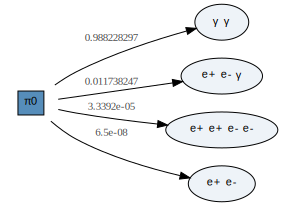

In [5]:
DecayChainViewer(pi0_chain)

A regular `phasespace.GenParticle` instance would not be able to simulate this decay, since the $\pi^0$ particle can decay in four different ways. However, a `FullDecay` object can be created directly from a DecayLanguage dict:

In [9]:
pi0_decay = FullDecay.from_dict(pi0_chain)

One can then simulate this decay using the `.generate` method, which works the same as the `GenParticle.generate` method.

In [20]:
weights, events = pi0_decay.generate(n_events=10_000, normalize_weights=True)

When creating a `FullDecay` object, the DecayLanguage dict is "unpacked" into separate GenParticle instances, where each GenParticle instance corresponds to one way that the particle can decay.

These GenParticle instances and the probabilities of that decay mode can be accessed via `FullDecay.gen_particles`. This is a list of tuples, where the first element in the tuple is the probability and the second element is the GenParticle.

In [30]:
for probability, particle in gen_particles:
    print(f"There is a probability of {probability} "
          f"that pi0 decays into {', '.join(child.name for child in particle.children)}")

There is a probability of 0.988228297 that pi0 decays into gamma, gamma [0]
There is a probability of 0.011738247 that pi0 decays into e+, e-, gamma [1]
There is a probability of 3.3392e-05 that pi0 decays into e+ [0], e+ [1], e- [0], e- [1]
There is a probability of 6.5e-08 that pi0 decays into e+ [2], e- [2]


When calling the `FullDecay.generate` method, it internally calls the generate method on all of these GenParticle instances. These are then placed in a list, which is returned. This is why the returned weights and events from `FullDecay.generate` are lists.

In [33]:
# TODO add more about mass functions, the zfit parameter, and tolerance